## Project Overview
- Data represents a number of patients who had Kyphosis and a operation. That operation was a corrective spinal surgery. The data represents if the kyphosis was present after the surgery.

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("resources/kyphosis.csv")

In [4]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


## Exploratory analyis
- Appears that there is slight indication that with more verterbre involved and the Starting point of the surgery the child involved there seems to be a existance of kyphosis.

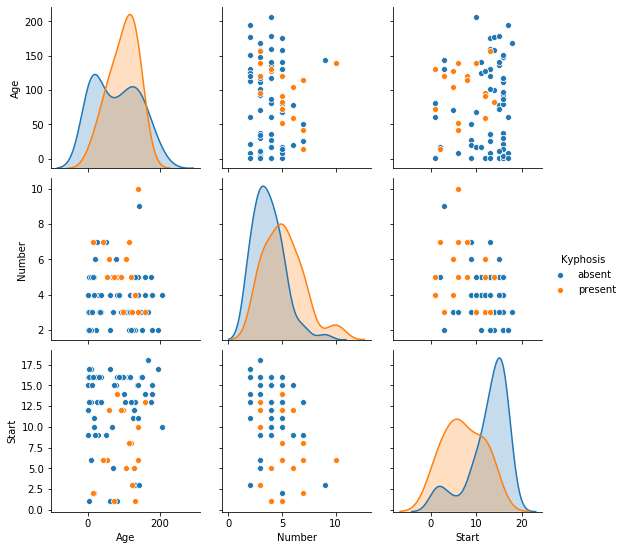

In [6]:
sns.pairplot(data, hue="Kyphosis")

### Something to consider 
- There is far more patients that are deemed "Absent" of Kyphosis in the data set so this my effect our model a bit since the data is unbalanced
- especially since the data set we have is already not so large

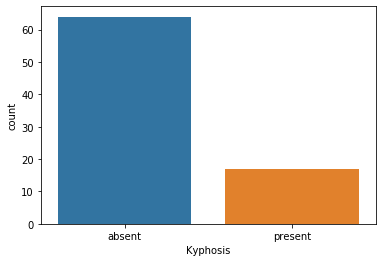

In [7]:
sns.countplot(data["Kyphosis"])

#### Age 
- Appears we have a wide range of ages, in months for all children in the data set

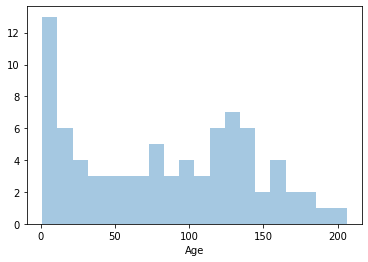

In [11]:
sns.distplot(data["Age"], bins = 20, kde=False)

## Number and start
- WE can see in most cases as the number of verterbre incolved in th esurgery increases the start point of the surgery lowers down the spine. 

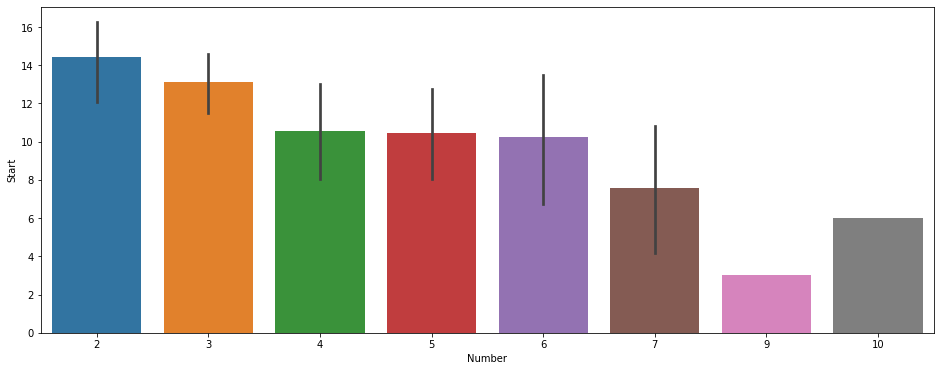

In [14]:
plt.figure(figsize=(16,6))
sns.barplot(x="Number", y="Start", data = data)

### Coorelation Analysis
- There is a negative coorelation between start and number 
- Validating the theory we have above

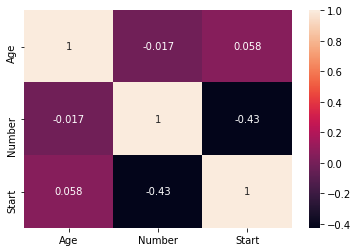

In [16]:
sns.heatmap(data.corr(), annot=True)

## Data Prepration 

In [17]:
X = data.drop("Kyphosis", axis=1)
y = data["Kyphosis"]

### Training testing  splitting

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [22]:
X_train.shape

(56, 3)

### Training a single Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model = DecisionTreeClassifier()

In [25]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
predictions = model.predict(X_test)

In [27]:
predictions

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent'], dtype=object)

### Metrics

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [29]:
print(confusion_matrix(y_test, predictions))

[[13  4]
 [ 6  2]]


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

    accuracy                           0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25



### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model =RandomForestClassifier()

In [35]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
pre = model.predict(X_test)

In [37]:
pre

array(['absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [38]:
print(confusion_matrix(y_test, pre))

[[17  0]
 [ 6  2]]


In [39]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

